Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various
biomedical measurements.
To answer question 5, average the performance of the models over 10 separate runs. In each
run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

5. [2v] Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

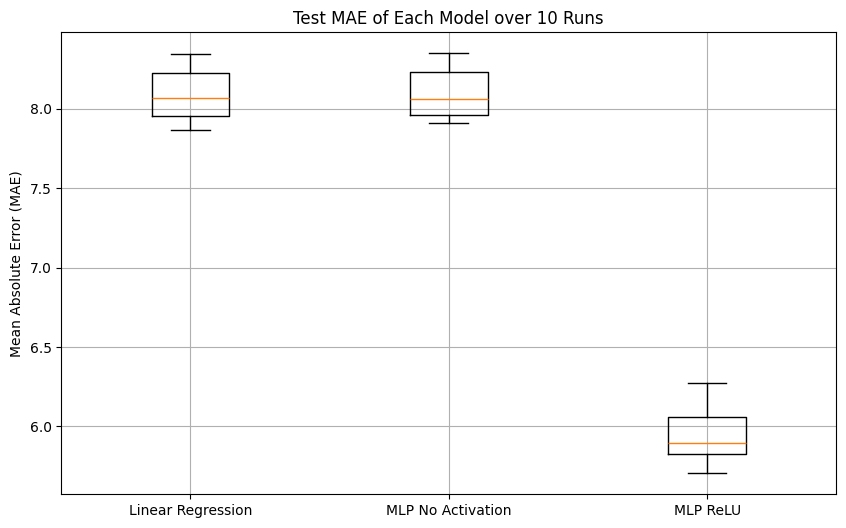

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

filterwarnings('ignore')

# Load the data
data = pd.read_csv("parkinsons.csv", delimiter=',')
X = data.drop('target', axis=1)
y = np.ravel(data['target'])

# Initialize variables to store MAE results
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Loop over 10 runs with different random train-test splits
for i in range(1, 11):
    # Split the data (80-20 split with different random states)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # 1. Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_lr))
    
    # 2. MLP Regressor without activation functions (identity)
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_mlp_no_act))
    
    # 3. MLP Regressor with ReLU activation functions
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

# Create a DataFrame for plotting
results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

# Plot the boxplot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([results['Linear Regression'], results['MLP No Activation'], results['MLP ReLU']], 
            labels=['Linear Regression', 'MLP No Activation', 'MLP ReLU'])
plt.title('Test MAE of Each Model over 10 Runs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()


6. [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact
and the importance of using activation functions in a MLP. Support your reasoning with the
results from the boxplots.

Comparando os resultados entre uma Regressão Linear e uma MLP sem funções de ativação, podemos verificar como as funções de ativação impactam e são cruciais nas redes neurais com base nos boxplots apresentados. A Regressão Linear é uma regressão que ajusta uma linha entre os dados, assumindo uma relação linear entre as variáveis. Como pode ser observado no box plot, o erro médio absoluto da Regressão Linear é mais ou menos igual a 8.0. Ou seja, um modelo linear tem baixa capacidade de adequar modelos de alto grau de complexidade ou não lineares, pois só ajusta esse tipo de relação linear entre variáveis. Uma MLP sem uma função de ativação, por outro lado, se assemelha a uma Regressão Linear. Isso acontece porque, sem funções de ativação, cada camada da MLP realiza uma transformação linear dos dados. Isto é, a saída de cada camada é apenas uma combinação linear de seus valores de entrada. Como resultado, uma MLP sem ativação comporta-se muito semelhante à já mencionada (Regressão Linear) e o seu MAE é de aproximadamente 8.0, como mostra o boxplot. Porém, no caso da MLP com a função de ativação ReLU, esta é a responsável pela introdução da não-linearidade no modelo. Especificamente, a não-linearidade permite que a MLP emita padrões no espaço de dados mais complexos do que apenas transformações lineares, que é de fato o caso das simples redes lineares perceptron. O gráfico revela que a MLP com a função de ativação ReLU faz uma diferença significativa para o erro médio absoluto, pois cai drasticamente para cerca de 6.0.
Em resumo, a comparação mostra que uma MLP sem a função de ativação tem desempenho semelhante ao de uma Regressão Linear, enquanto a utilização de funções de ativação, como ReLU, melhora substancialmente o desempenho da rede ao permitir a modelagem de relações não lineares.

7. [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The
parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii)
learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values
{32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the
best combination, and discuss the trade-offs between the combinations.

Best parameters found by Grid Search: {'alpha': 0.001, 'batch_size': 32, 'learning_rate_init': 0.01}
Test MAE of the best MLP Regressor: 4.701252509164725


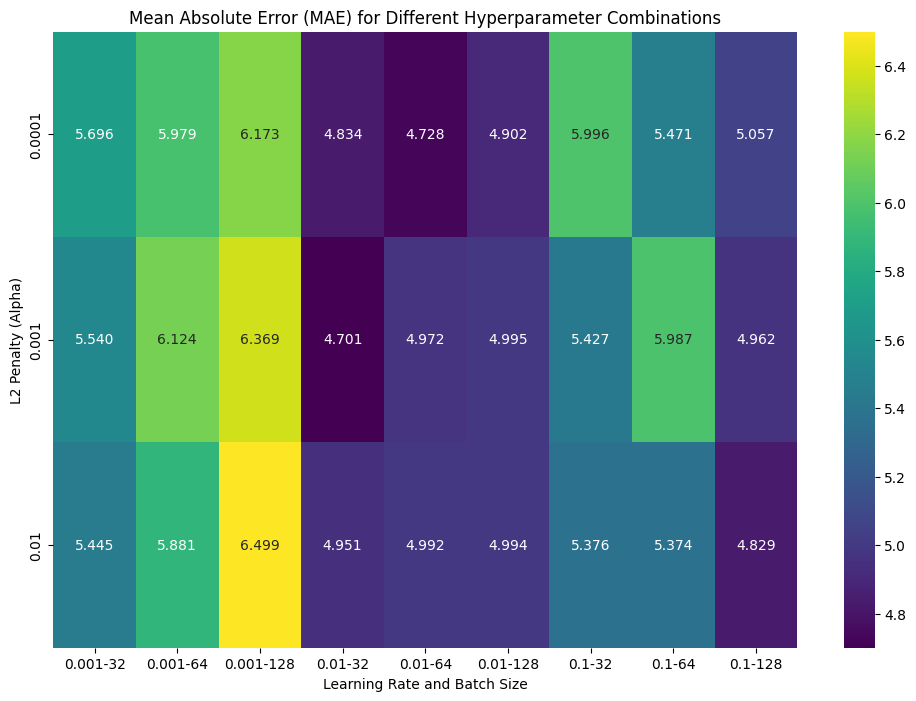

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns

filterwarnings('ignore')

# Load the data
data = pd.read_csv("parkinsons.csv", delimiter=',')
X = data.drop('target', axis=1)
y = np.ravel(data['target'])

# Split the data (80-20 split with random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128],  # Batch size
}

# MLP Regressor to be tuned
mlp = MLPRegressor(hidden_layer_sizes=(10, 10))

# GridSearchCV setup
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Train-test split with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding test MAE

print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Test MAE of the best MLP Regressor:", -1*grid_search.best_score_)

# Reshape the results for plotting
results = grid_search.cv_results_

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'alpha': results['param_alpha'],
    'learning_rate_init': results['param_learning_rate_init'],
    'batch_size': results['param_batch_size'],
    'mean_test_score': -results['mean_test_score']  # Convert to MAE
})

# Pivot the DataFrame for heatmap plotting
heatmap_data = results_df.pivot_table(index='alpha', columns=['learning_rate_init', 'batch_size'], values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Mean Absolute Error (MAE) for Different Hyperparameter Combinations')
plt.xlabel('Learning Rate and Batch Size')
plt.ylabel('L2 Penalty (Alpha)')
plt.show()

Complexidade da modelagem: Aumentar o parâmetro alfa pode ser eficaz em controlar o overfitting, mas isso pode limitar a habilidade do modelo de aprender relações mais intrincecas. 

Ritmo da convergência versus estabilidade: A taxa de aprendizagem tem um papel fundamental na velocidade da adaptação do modelo aos dados. Contudo, é fundamental encontrar um meio-termo para garantir que a convergência ocorra de forma estável. Se a taxa for muito elevada, pode impedir que o modelo converja adequadamente. As mudanças mais rápidas nem sempre resultam na compreensão mais profícua, exigindo um ritmo ponderado entre velocidade e consistência.

Eficiência vs. Estabilidade: A escolha do tamanho do lote impacta tanto a velocidade do treinamento quanto a estabilidade do modelo. Lotes menores podem oferecer uma melhor capacidade de generalização, mas geralmente a um custo computacional mais elevado. Por outro lado, lotes maiores podem acelerar o processamento, mas também podem aumentar o risco de overfitting.